# EULER CHARACTERISTIQUE PROFIL(ECP)
**Auteur:** Mamoudou Sidibe

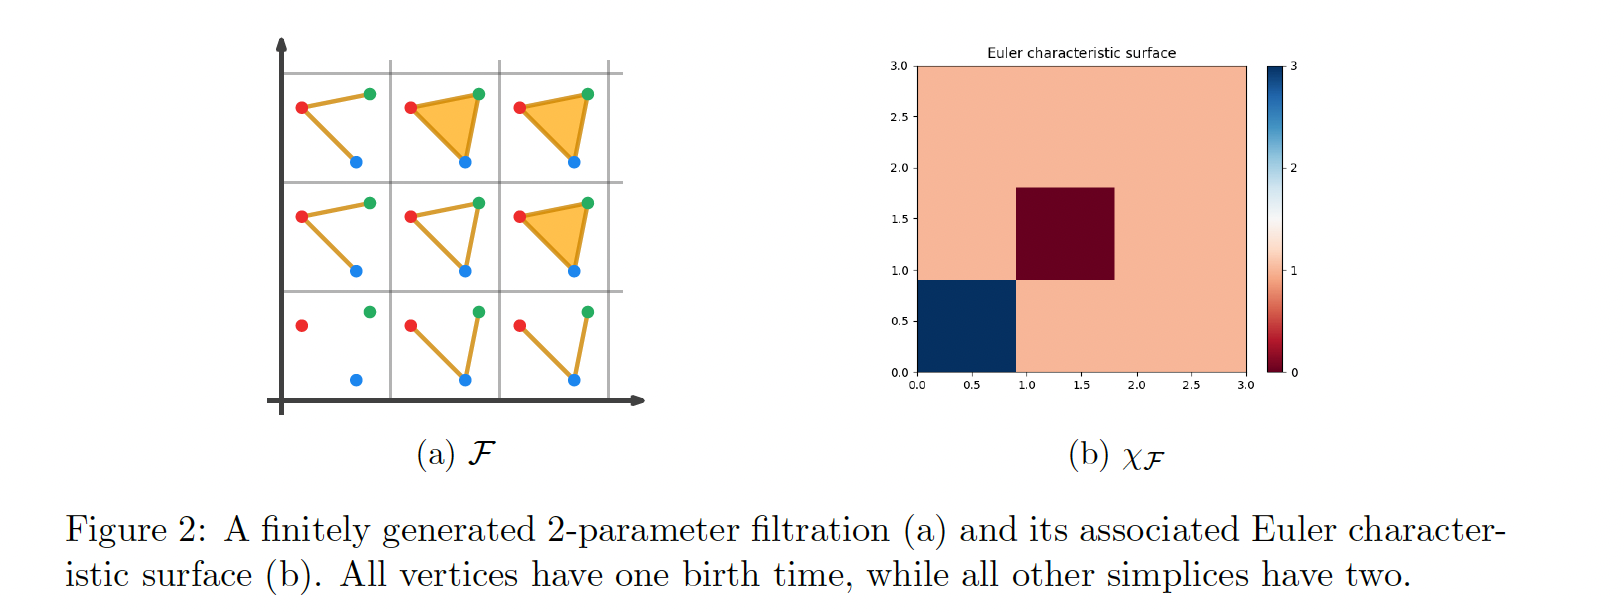

(a) 

F     (b) 
χ
F
 
Figure 2 : Une filtration à 2 paramètres finiment engendrée (a) et sa surface de caractéristique d’Euler associée (b). Tous les sommets ont un seul instant de naissance, tandis que tous les autres simplexes en ont deux.

 ----------------

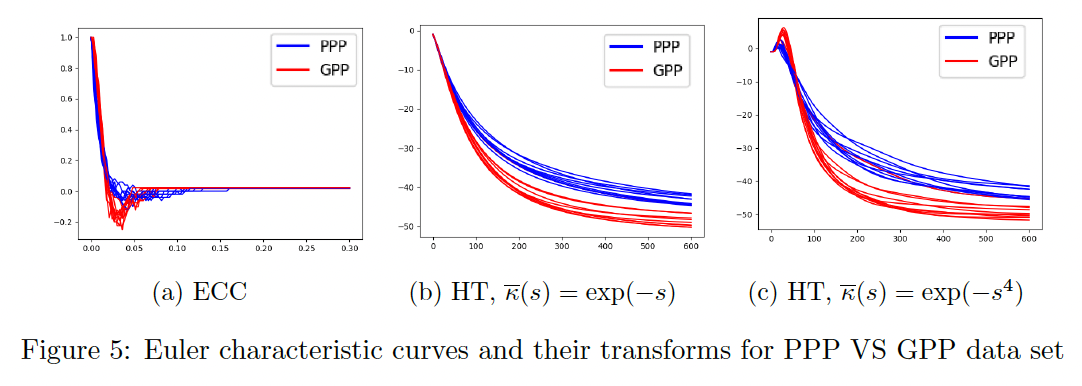

---------------------------------

# HYBRID TRANSFORM OF EULER CHARACTERISTIC PROFILES

nous tirons 1000 points de façon uniforme au hasard sur le disque unité d'une surface de courbure constante 
K, et nous essayons de prédire K dans un cadre supervisé.

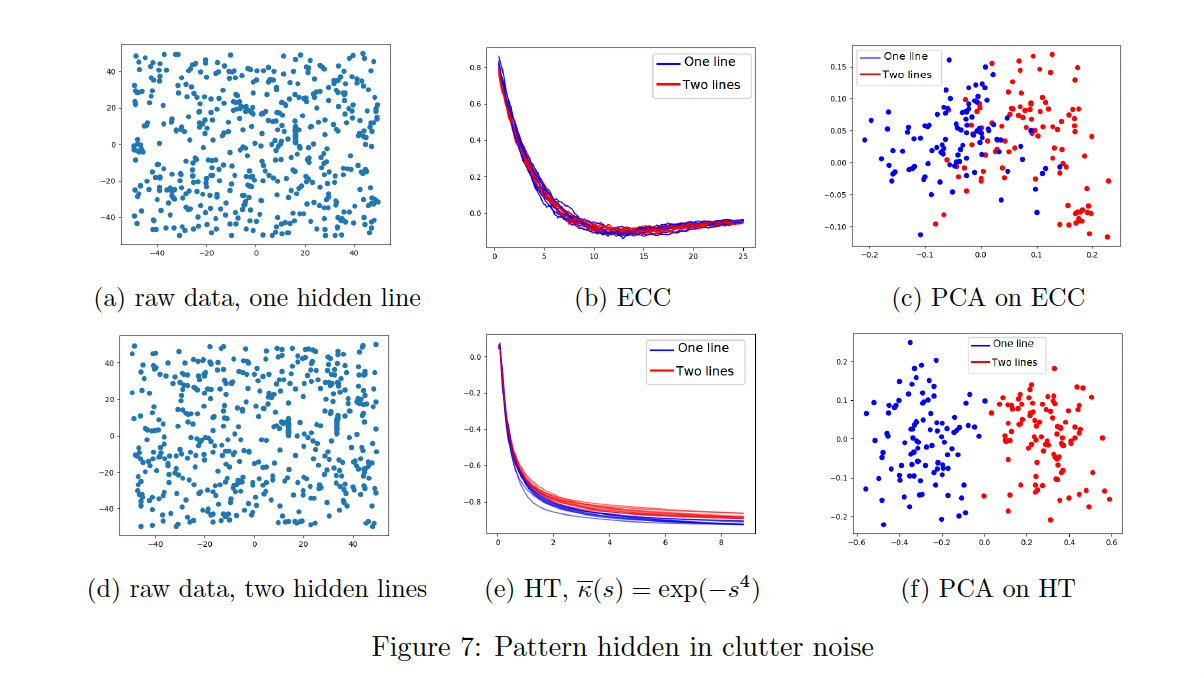

Nous comparons les scores 

R 
2
  dans le Tableau 1 avec ceux de l’article original, qui utilise les persistent landscapes (PL) avec un régressseur à vecteurs de support (SVR) ainsi que Persformer (Reinauer et al., 2021).

# Supervised classification.

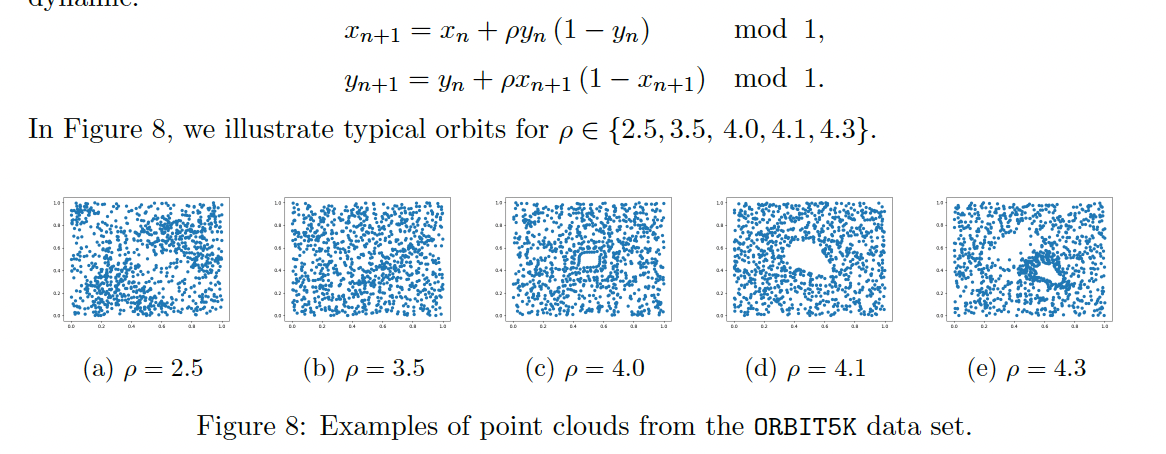

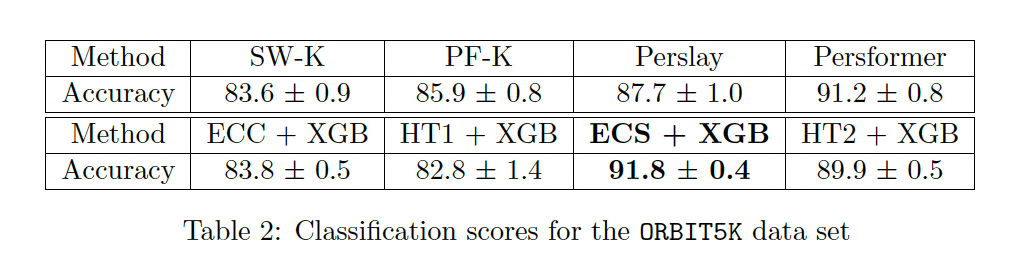

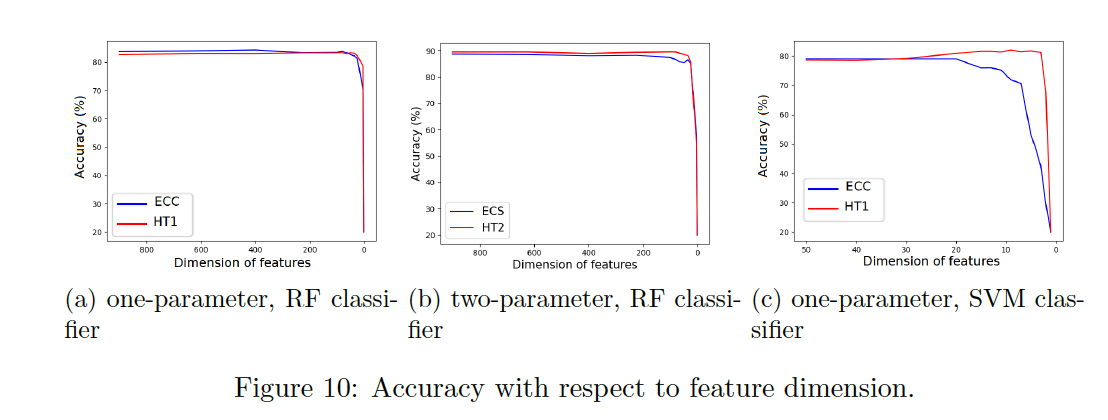

In [10]:
pip install gudhi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 7.9 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.stats import gaussian_kde

# Génération d'un nuage de points aléatoire
np.random.seed(42)
num_points = 1000
points = np.random.rand(num_points, 2)

# Filtration : distances à un point fixe (par exemple, le centre)
center = np.array([0.5, 0.5])
filtration = np.linalg.norm(points - center, axis=1)

# Profil de caractéristique d'Euler (EC) : histogramme de niveaux de filtration
def euler_characteristic_profile(filtration, bins=30):
    counts, bin_edges = np.histogram(filtration, bins=bins)
    ecc = np.cumsum(counts)
    return bin_edges[:-1], ecc

filtr_vals, ecc_vals = euler_characteristic_profile(filtration)

# Transformée hybride : ici, intégrale pondérée par une fonction test (ex. Gaussienne)
def hybrid_transform_ecc(filtr_vals, ecc_vals):
    kernel = lambda s: np.exp(-s**2)
    ht_vals = ecc_vals * kernel(filtr_vals)
    return ht_vals

ht_vals = hybrid_transform_ecc(filtr_vals, ecc_vals)

# Pushforward : image de la mesure ECC par la filtration
def pushforward_ecc(filtr_vals, ecc_vals):
    kde = gaussian_kde(filtr_vals, weights=ecc_vals)
    x_vals = np.linspace(min(filtr_vals), max(filtr_vals), 100)
    y_vals = kde(x_vals)
    return x_vals, y_vals

push_x, push_y = pushforward_ecc(filtr_vals, ecc_vals)

# Filtrée ECC : lissage avec une KDE
def filtered_ecc(filtr_vals, ecc_vals, bandwidth='scott'):
    kde = gaussian_kde(filtr_vals, weights=ecc_vals, bw_method=bandwidth)
    smoothed_vals = kde(filtr_vals)
    return smoothed_vals

filtered_vals = filtered_ecc(filtr_vals, ecc_vals)

# Visualisation
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

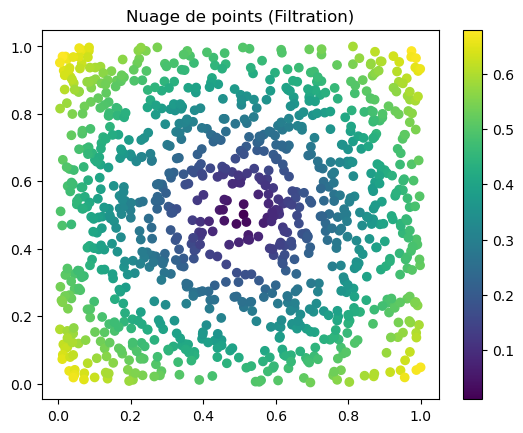

In [21]:
plt.plot()
plt.scatter(points[:, 0], points[:, 1], c=filtration, cmap='viridis')
plt.title("Nuage de points (Filtration)")
plt.colorbar()

🟢 1. Nuage de points (Filtration)
![Nuage de points]

Un nuage de 1000 points distribués aléatoirement dans le carré unité [0,1]2.
Chaque point est coloré en fonction de sa distance au centre (0.5, 0.5).

Rôle : Cette distance sert de fonction de filtration (c’est ce qui génère l’évolution topologique).

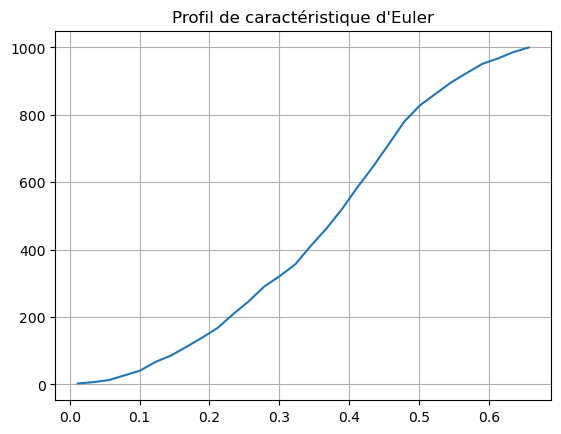

In [22]:
plt.plot()
plt.plot(filtr_vals, ecc_vals, label='ECC')
plt.title("Profil de caractéristique d'Euler")
plt.grid()

🔵 2. Profil de caractéristique d’Euler (ECC)
![ECC]

Axe des X : Valeurs de filtration (distances croissantes au centre).

Axe des Y : Valeurs cumulées (nombre de points jusqu’à un certain seuil de filtration).

Rôle : Simule un profil de caractéristique d’Euler (même si ici c’est une approximation simplifiée par histogramme).

Ce que ça dit : Comment la topologie évolue quand on “balaye” le nuage par la filtration.

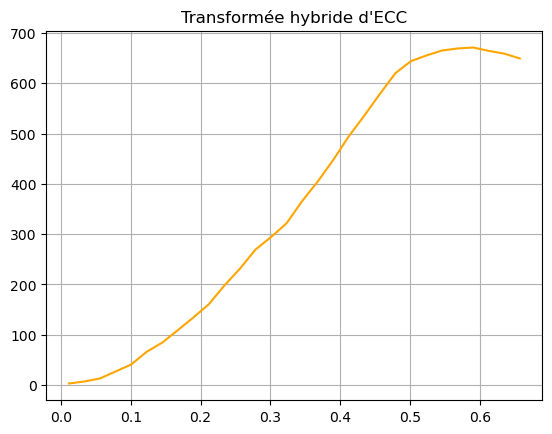

In [23]:
plt.plot()
plt.plot(filtr_vals, ht_vals, label='HT(ECC)', color='orange')
plt.title("Transformée hybride d'ECC")
plt.grid()

🟠 3. Hybrid Transform of ECC
![HT]


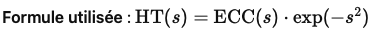

Interprétation : Cela pondère l’ECC avec une fonction décroissante (ici gaussienne) pour donner plus de poids aux petites échelles (proches du centre).

Utilité : Met en valeur les structures fines du nuage.

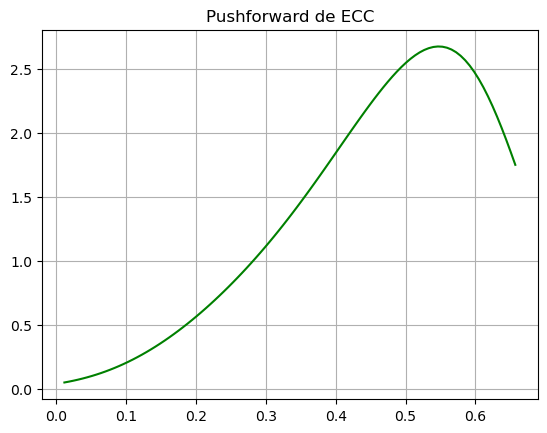

In [24]:
plt.plot()
plt.plot(push_x, push_y, label='Pushforward', color='green')
plt.title("Pushforward de ECC")
plt.grid()

🟩 4. Pushforward de ECC

![Pushforward]

But : Représente la densité estimée de la filtration pondérée par les valeurs de l’ECC.
    
Méthode : Utilisation d’un noyau de Parzen (KDE) avec ECC comme poids.
    
Ce que ça montre : À quelles échelles (valeurs de filtration) l’information topologique est la plus “dense”.

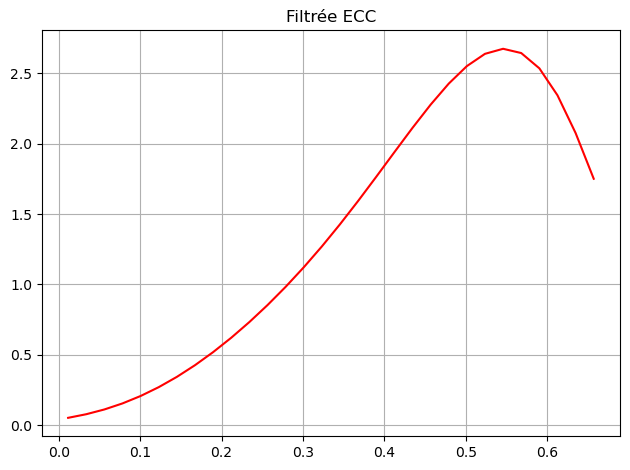

In [25]:
plt.plot()
plt.plot(filtr_vals, filtered_vals, label='Filtered ECC', color='red')
plt.title("Filtrée ECC")
plt.grid()

plt.tight_layout()
plt.show()

🔴 5. ECC filtrée (Filtered ECC)
![Filtered ECC]

But : Fournir une version lissée de l’ECC pour éviter les sauts brusques.

Méthode : Estimation de densité (KDE) avec les valeurs de filtration comme positions et ECC (rendues positives) comme poids.

Ce que ça dit : Une vue plus fluide et régulière du comportement global de la topologie du nuage.